### Lecture 14a

In [2]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Naming Conventions  
For classes, names should be in camel case (ex: NumList)  
Otherwise Python variables and function names should be in snake case (ex: num_list)  
Python constats are usually all in upper case (ex: HRS_IN_DAY = 24)

In [10]:
round.__doc__

'Round a number to a given precision in decimal digits.\n\nThe return value is an integer if ndigits is omitted or None.  Otherwise\nthe return value has the same type as the number.  ndigits may be negative.'

In [12]:
print(round.__doc__)

Round a number to a given precision in decimal digits.

The return value is an integer if ndigits is omitted or None.  Otherwise
the return value has the same type as the number.  ndigits may be negative.


In [14]:
round(123.456, 2)

123.46

In [16]:
round(123.456, -2)

100.0

### Throwaway Variables

In [36]:
hr, minute, __ = (12, 17, 28) # when you don't need to reference the seconds

In [38]:
hr

12

In [29]:
minute

17

In [42]:
[random.random() for _ in range(5)]

[0.5967918845179703,
 0.06303716087028666,
 0.5973590905045372,
 0.920838487274885,
 0.9808250033067589]

### Asterisk for Packing and Unpacking

In [45]:
letters = 'xyz'
pos = [24, 25, 26]

In [49]:
tuples = list(zip(letters, pos))
tuples

[('x', 24), ('y', 25), ('z', 26)]

In [53]:
tuple1, tuple2 = zip(*tuples)

In [55]:
tuple1

('x', 'y', 'z')

In [57]:
tuple2

(24, 25, 26)

In [59]:
print(pos)

[24, 25, 26]


In [61]:
print(*pos) # pass pos elements as separate arguments

24 25 26


In [63]:
print(24, 25, 26)

24 25 26


In [73]:
def greet(*names): # *names allows for multiple arguments
    print('Hi', names, '!')

In [75]:
greet('Alice', 'Bob', 'Carol')

Hi ('Alice', 'Bob', 'Carol') !


In [81]:
def greet2(*names):
    print('Hi', *names, '!')

In [83]:
greet2('Alice', 'Bob', 'Carol')

Hi Alice Bob Carol !


In [85]:
def greet3(*names):
    for who in names:
        print('Hi', who, '!')

In [87]:
greet3('Alice', 'Bob', 'Carol')

Hi Alice !
Hi Bob !
Hi Carol !


In [97]:
def greet4(what, *names):
    for who in names:
        print(what, who, '!')

In [99]:
greet4('Hello', 'Alice', 'Bob', 'Carol')

Hello Alice !
Hello Bob !
Hello Carol !


### Mapping or Applying Functions

Let $f(x) = x^2 + 3x$, Applying the function to a list in 3 ways:
* Using a list comprehension.
* Using numpy vectorization.
* Using `map()`

In [103]:
xvals = [10, -2, 20]

In [111]:
[x*x + 3*x for x in xvals]

[130, -2, 460]

In [113]:
x_arr = np.array(xvals)
x_arr

array([10, -2, 20])

In [115]:
x_arr*x_arr + 3*x_arr

array([130,  -2, 460])

In [118]:
def f(x):
    return x*x + 3*x

In [120]:
[f(x) for x in xvals]

[130, -2, 460]

In [122]:
f(x_arr)

array([130,  -2, 460])

In [124]:
list(map(f, xvals))

[130, -2, 460]

### Anonymous `lambda` Functions  
Unnamed, simple, one-line functions

In [127]:
lambda x: x*x + 3*x

<function __main__.<lambda>(x)>

In [129]:
(lambda x: x*x + 3*x)(10)

130

In [131]:
(lambda x: x*x + 3*x)(x_arr)

array([130,  -2, 460])

In [135]:
list(map(lambda x: x*x + 3*x, xvals))

[130, -2, 460]

In [137]:
f = lambda x: x*x + 3*x

In [139]:
f(x_arr)

array([130,  -2, 460])

`lambda` with multiple arguments:

$c(d, p) = 10d+p$

In [142]:
(lambda d, p: 10*d + p)(3, 4)

34

In [144]:
dimes = np.array([6, 7, 8])
pennies = np.array([1, 2, 3])
(lambda d, p: 10*d + p)(dimes, pennies)

array([61, 72, 83])

### Plotting Lambda Functions  
Recall `plot_func(func, interval)` with $(a, b)$ as the interval. 

In [162]:
def plot_func(func, interval):
    xvals = np.linspace(*interval)
    yvals = list(map(func, xvals))
    
    plt.plot(xvals, yvals)
    plt.show()

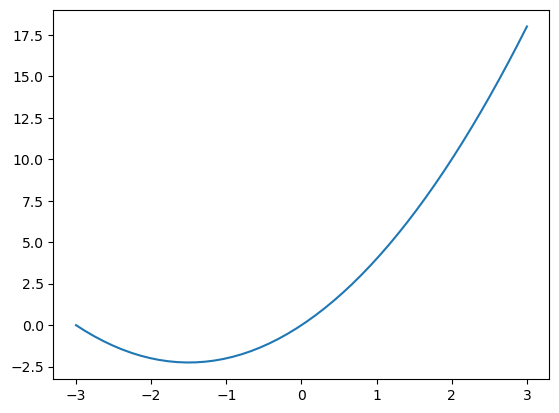

In [164]:
plot_func(lambda x: x*x + 3*x, (-3, 3))

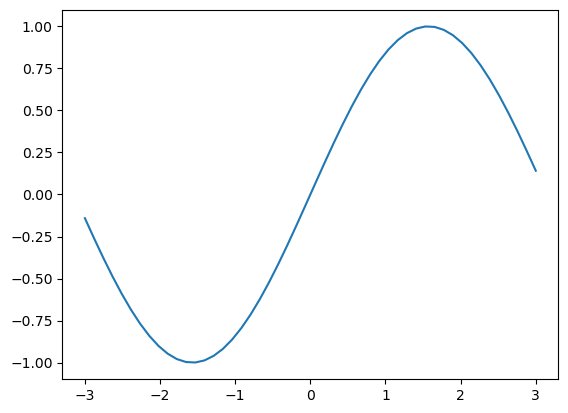

In [166]:
plot_func(math.sin, (-3, 3))

### Applying Functions to a DataFrame Column

In [169]:
df = pd.DataFrame([('Ralphie', 123456789), ('Marie', 987654321)], 
                   columns=['Name', 'SSN'])
df

,Name,SSN
0,Ralphie,123456789
1,Marie,987654321


Change 123456789 to '123-45-6789'

In [184]:
def ssn_dash(ssn):
    '''Take a 9-digit SSN and return a string, with dashes inserted'''
    part1 = str(ssn)[:3]
    part2 = str(ssn)[3:5]
    part3 = str(ssn)[5:]
    return part1 + '-' + part2 + '-' + part3

In [186]:
ssn_dash(123456789)

'123-45-6789'

In [192]:
df.SSN.apply(ssn_dash) #makes a copy

0    123-45-6789
1    987-65-4321
Name: SSN, dtype: object

In [194]:
df.SSN = df.SSN.apply(ssn_dash)

In [196]:
df

,Name,SSN
0,Ralphie,123-45-6789
1,Marie,987-65-4321
